In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"D:\Sameer\Sameer IMARTICUS\Machine Learning\Decision Tree\Exam\admission.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
data.describe(percentiles=[0.01,0.02,0.05,0.1,0.25,0.5,0.75,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Serial No.,500.0,250.50000,144.481833,1.00,5.9900,10.9800,25.950,50.900,125.7500,250.50,375.25,450.100,475.05,480.0400,485.0300,490.0200,495.0100,500.00
GRE Score,500.0,316.47200,11.295148,290.00,294.9900,295.9800,298.000,300.000,308.0000,317.00,325.00,331.000,335.00,336.0000,338.0000,339.0000,340.0000,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,94.9900,96.0000,98.000,99.000,103.0000,107.00,112.00,116.000,118.00,118.0000,119.0000,119.0000,120.0000,120.00
University Rating,500.0,3.11400,1.143512,1.00,1.0000,1.0000,1.000,2.000,2.0000,3.00,4.00,5.000,5.00,5.0000,5.0000,5.0000,5.0000,5.00
SOP,500.0,3.37400,0.991004,1.00,1.0000,1.5000,1.500,2.000,2.5000,3.50,4.00,4.500,5.00,5.0000,5.0000,5.0000,5.0000,5.00
LOR,500.0,3.48400,0.925450,1.00,1.5000,1.5000,2.000,2.000,3.0000,3.50,4.00,4.550,5.00,5.0000,5.0000,5.0000,5.0000,5.00
CGPA,500.0,8.57644,0.604813,6.80,7.2797,7.3992,7.638,7.809,8.1275,8.56,9.04,9.362,9.60,9.6504,9.6806,9.7604,9.8204,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,0.0000,0.000,0.000,0.0000,1.00,1.00,1.000,1.00,1.0000,1.0000,1.0000,1.0000,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.3799,0.4200,0.470,0.530,0.6300,0.72,0.82,0.920,0.94,0.9400,0.9500,0.9600,0.9600,0.97


# Q.1 Perform Exploratory Data Analysis (EDA) tasks 
# a) Visualize the 10 random rows of the data set
# b) Generate the description for numeric variables
# c) Check the shape of the data set
# d) Generate the correlation matrix

In [48]:
data_cp=data.copy()

In [7]:
data_v=data.sample(n=10)

In [8]:
data_v

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
344,345,295,96,2,1.5,2.0,7.34,0,0.47
274,275,315,100,1,2.0,2.5,7.95,0,0.58
298,299,330,114,3,4.5,4.5,9.24,1,0.90
273,274,312,99,1,1.0,1.5,8.01,1,0.52
380,381,322,104,3,3.5,4.0,8.84,1,0.78
417,418,316,103,3,3.5,2.0,7.68,0,0.52
316,317,298,101,2,1.5,2.0,7.86,0,0.54
200,201,317,103,3,2.5,3.0,8.54,1,0.73
312,313,311,107,4,4.5,4.5,9.00,1,0.78
28,29,295,93,1,2.0,2.0,7.20,0,0.46


<AxesSubplot:>

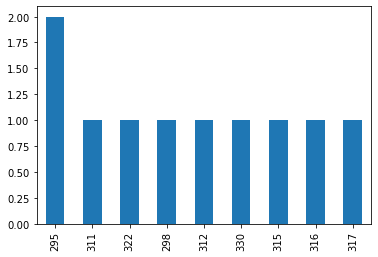

In [9]:
data_v["GRE Score"].value_counts().plot(kind='bar')

<AxesSubplot:>

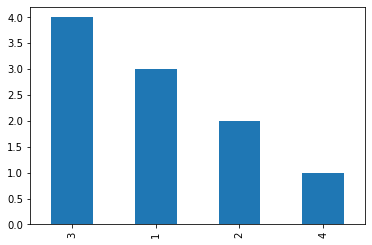

In [10]:
data_v['University Rating'].value_counts().plot(kind='bar')

<AxesSubplot:>

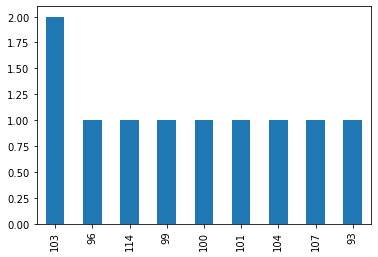

In [11]:
data_v['TOEFL Score'].value_counts().plot(kind='bar')

In [12]:
data.shape

(500, 9)

In [13]:
data_DP=data_cp.drop(columns=['Serial No.'])

In [14]:
data_DP.describe(percentiles=[0.01,0.02,0.05,0.1,0.25,0.5,0.75,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
GRE Score,500.0,316.47200,11.295148,290.00,294.9900,295.9800,298.000,300.000,308.0000,317.00,325.00,331.000,335.00,336.0000,338.0000,339.0000,340.0000,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,94.9900,96.0000,98.000,99.000,103.0000,107.00,112.00,116.000,118.00,118.0000,119.0000,119.0000,120.0000,120.00
University Rating,500.0,3.11400,1.143512,1.00,1.0000,1.0000,1.000,2.000,2.0000,3.00,4.00,5.000,5.00,5.0000,5.0000,5.0000,5.0000,5.00
SOP,500.0,3.37400,0.991004,1.00,1.0000,1.5000,1.500,2.000,2.5000,3.50,4.00,4.500,5.00,5.0000,5.0000,5.0000,5.0000,5.00
LOR,500.0,3.48400,0.925450,1.00,1.5000,1.5000,2.000,2.000,3.0000,3.50,4.00,4.550,5.00,5.0000,5.0000,5.0000,5.0000,5.00
CGPA,500.0,8.57644,0.604813,6.80,7.2797,7.3992,7.638,7.809,8.1275,8.56,9.04,9.362,9.60,9.6504,9.6806,9.7604,9.8204,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,0.0000,0.000,0.000,0.0000,1.00,1.00,1.000,1.00,1.0000,1.0000,1.0000,1.0000,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.3799,0.4200,0.470,0.530,0.6300,0.72,0.82,0.920,0.94,0.9400,0.9500,0.9600,0.9600,0.97


<AxesSubplot:>

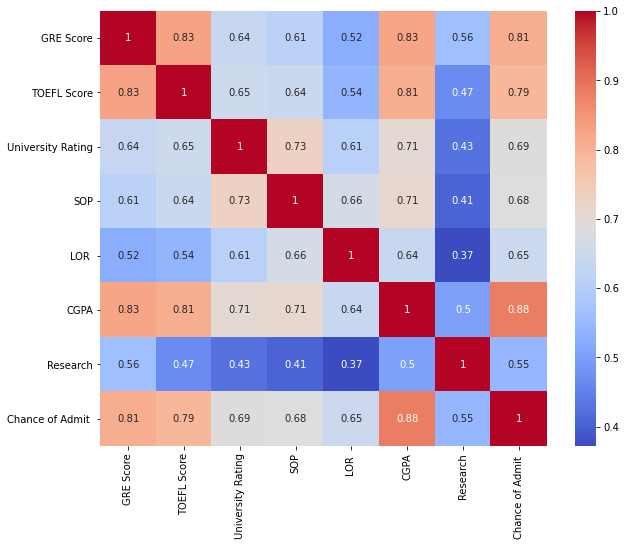

In [15]:
plt.figure(figsize=[10,8])
sns.heatmap(data_DP.corr(),cmap='coolwarm',annot=True)

# Q.2 Find out the minimum and maximum values for GRE score

In [16]:
data['GRE Score'].max()

340

In [17]:
data['GRE Score'].min()

290

# Q.3 Find out the percentage of universities for each university rating

In [18]:
data['University Rating'].value_counts(normalize=True)

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64

In [19]:
pd.DataFrame(data.groupby(['University Rating']).size()/500,columns=['Percentage %'])

,Percentage %
University Rating,
1,0.068
2,0.252
3,0.324
4,0.210
5,0.146


In [20]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# Q.4
# Convert the target variable “Chance of Admit” to 
# categorical having values 0 and 1,such that :
# Students having the “Chance of Admit” value > 0.80, are assigned 
# value 1, and
# Students having the “Chance of Admit” value < 0.80, are assigned 
# value 0
# Where 0: Low chance of Admission and 1: High chance of 
# admission

In [49]:
data_cp['admision'] = np.where(data_cp['Chance of Admit '] > 0.8,1,0)

In [50]:
data_cp

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admision
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87,1
496,497,337,117,5,5.0,5.0,9.87,1,0.96,1
497,498,330,120,5,4.5,5.0,9.56,1,0.93,1
498,499,312,103,4,4.0,5.0,8.43,0,0.73,0


# Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve  the accuracy of the model.

In [51]:
data_clean=data_cp.drop(columns=['Serial No.','Chance of Admit '])

In [52]:
data_clean

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,admision
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0


In [53]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [54]:
X=data_clean.drop(columns=["admision"])
y=data_clean["admision"]

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=99)

In [57]:
dt=DecisionTreeClassifier(random_state=99) 
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

In [58]:
print("Train score :", dt.score(X_train, y_train))
print("Test score :", dt.score(X_test, y_test))

Train score : 1.0
Test score : 0.9


In [59]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[100,40,50,30], 
              'max_depth':[9,8,7,10],
              "min_samples_leaf":[33,30,35,32]
             }


tr = DecisionTreeClassifier()

gsearch = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [9, 8, 7, 10],
                         'min_samples_leaf': [33, 30, 35, 32],
                         'min_samples_split': [100, 40, 50, 30]},
             verbose=1)

In [60]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 33,
 'min_samples_split': 100}

In [61]:
gsearch.best_score_

0.9075

In [62]:
dt_model=DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_split=30, min_samples_leaf=35)
dt_model.fit(X_train, y_train)
print("Train score :", dt_model.score(X_train, y_train))
print("Test score :", dt_model.score(X_test, y_test))

Train score : 0.9275
Test score : 0.92


# Q.6 Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university.

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
from sklearn.model_selection import GridSearchCV

parameters={"n_estimators" : [30,35,40],
            "criterion": ["gini", "entropy"],
            "max_depth" :[12,14,15],
            "min_samples_split":[5,4,3],
            "min_samples_leaf" :[3,4,5,6],
            "max_features" :["log", "sqrt"],
            "bootstrap" : [True, False]
           }

rf=RandomForestClassifier()

rf_gs=GridSearchCV(estimator=rf,param_grid=parameters,scoring="accuracy", verbose=True, n_jobs=-1, cv=10)
rf_gs.fit(X_train, y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan 0.935  0.9325 0.9275 0.915
 0.93   0.935  0.9275 0.93   0.9325 0.9225 0.935  0.9325 0.93   0.9325
 0.93   0.9275 0.925  0.9325 0.9275 0.9275 0.9275 0.9275 0.9225 0.925
 0.935  0.9225 0.93   0.9275 0.925  0.9225 0.9225 0.925  0.935  0.93
 0.9275 0.925     nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan 0.9325 0.93
 0.9325 0.93   0.9225 0.9225 0.925  0.925  0.9225 0.915  0.93   0.9225
 0.9175 0.9

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 14, 15],
                         'max_features': ['log', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [5, 4, 3],
                         'n_estimators': [30, 35, 40]},
             scoring='accuracy', verbose=True)

In [87]:
rf_gs.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 35}

In [88]:
rf=RandomForestClassifier(criterion='gini' ,max_depth=14, n_estimators= 35)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=14, n_estimators=35)

In [89]:
rf_model=rf.fit(X_train,y_train)
rf_model

RandomForestClassifier(max_depth=14, n_estimators=35)

In [90]:
rf_model.predict(X_train)
y_predictrf=rf_model.predict(X_train)
y_predictrf

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [91]:
rf_proba=rf_model.predict_proba(X_train)
rf_proba

array([[1.        , 0.        ],
       [0.97142857, 0.02857143],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.05714286, 0.94285714],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.11428571, 0.88571429],
       [0.97142857, 0.02857143],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.05714286, 0.94285714],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.94285714, 0.05714286],
       [0.97142857, 0.02857143],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.82857143, 0.17142857],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91428571, 0.08571429],
       [0.28571429, 0.71428571],
       [0.

In [92]:
print ("The Training Accuracy is:",rf_model.score(X_train,y_train))
print ("The Testing Accuracy is:",rf_model.score(X_test,y_test))

The Training Accuracy is: 1.0
The Testing Accuracy is: 0.92


# Q.7 Also use Ensemble Modelling techniques, to predict whether a student has a low or high chance of admission to a chosen university.

In [102]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators= 35, learning_rate= 0.01,random_state=0)
abc.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=35, random_state=0)

In [105]:
print ("The Training Accuracy is:",abc.score(X_train,y_train))
print ("The Testing Accuracy is:",abc.score(X_test,y_test))

The Training Accuracy is: 0.9275
The Testing Accuracy is: 0.92


# QQ.8 Compare all of the models and justify your choice about the optimum model.

In [104]:
Decision tree and AdaBoost are giving same Accuracy

SyntaxError: invalid syntax (<ipython-input-104-51f61a14b504>, line 1)